# Prodigy DataScience Internship

Task 4 : Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.


# Importing necessary libraries

In [10]:

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Data loading and pre-processing 


In [11]:


# Step 1: Load and Inspect Data
training_file_path = 'twitter_training.csv'  # Update with your file path
validation_file_path = 'twitter_validation.csv'  # Update with your file path

# Load datasets
training_data = pd.read_csv(training_file_path, encoding='utf-8', header=None)
validation_data = pd.read_csv(validation_file_path, encoding='utf-8', header=None)

# Rename columns for clarity
training_data.columns = ['ID', 'Topic', 'Sentiment', 'Text']
validation_data.columns = ['ID', 'Topic', 'Sentiment', 'Text']

# Combine datasets for analysis
combined_data = pd.concat([training_data, validation_data], ignore_index=True)

In [12]:
# Step 2: Sentiment Distribution Visualization
sentiment_counts = combined_data['Sentiment'].value_counts()

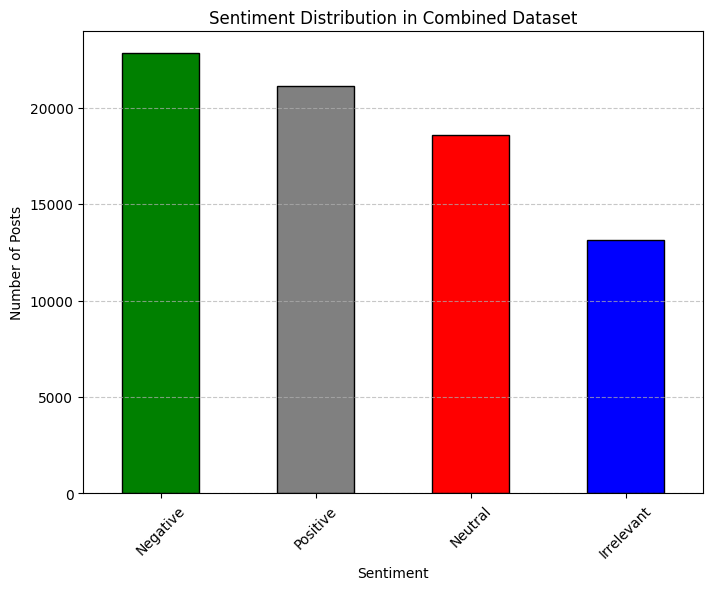

In [13]:
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red', 'blue'], edgecolor='black')
plt.title('Sentiment Distribution in Combined Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

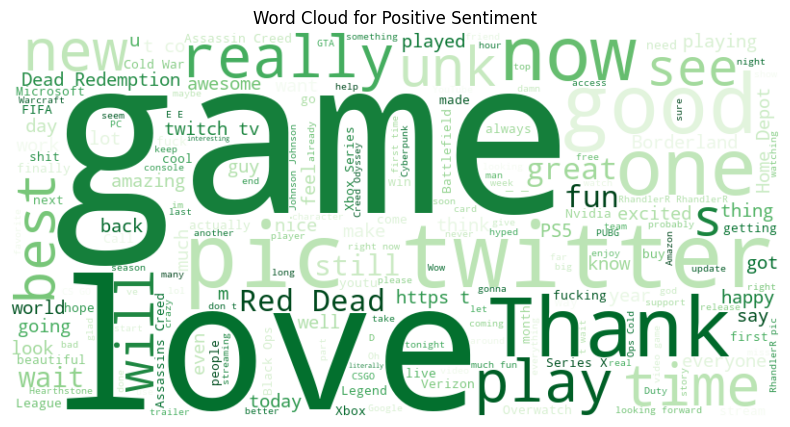

In [14]:
# Step 3: Word Clouds for Positive and Negative Sentiments
positive_text = ' '.join(combined_data[combined_data['Sentiment'] == 'Positive']['Text'].astype(str))
negative_text = ' '.join(combined_data[combined_data['Sentiment'] == 'Negative']['Text'].astype(str))

# Generate and display word clouds
positive_wordcloud = WordCloud(background_color='white', colormap='Greens', width=800, height=400).generate(positive_text)
negative_wordcloud = WordCloud(background_color='white', colormap='Reds', width=800, height=400).generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment')
plt.show()

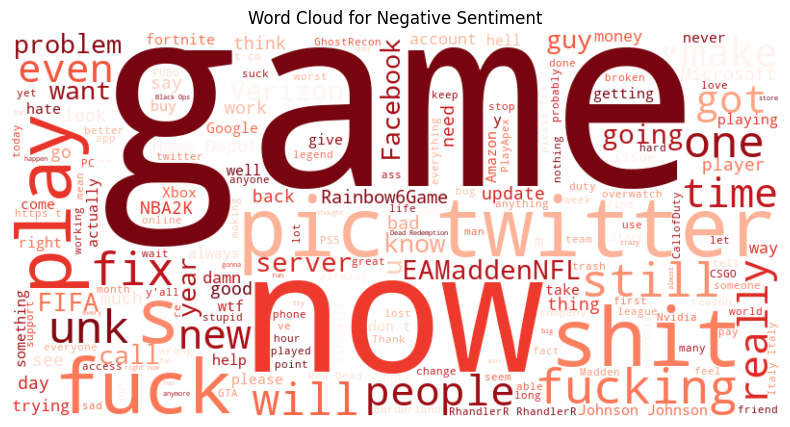

In [15]:
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment')
plt.show()

<Figure size 1400x800 with 0 Axes>

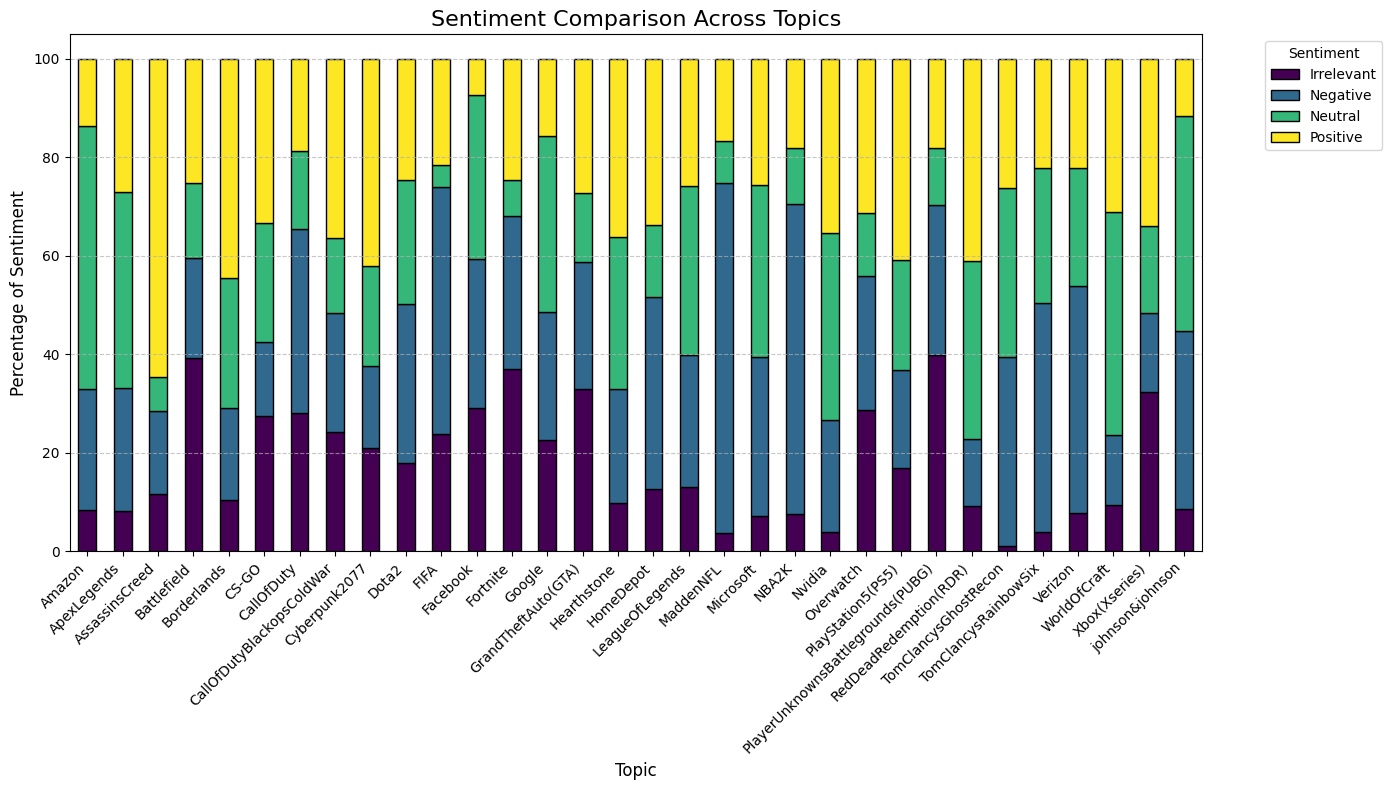

In [16]:
# Step 4: Sentiment Comparison Across Topics
# Group by Topic and Sentiment, then calculate size
sentiment_by_topic = combined_data.groupby(['Topic', 'Sentiment']).size().unstack(fill_value=0)

# Normalize counts to percentages for comparison
sentiment_percentage = sentiment_by_topic.div(sentiment_by_topic.sum(axis=1), axis=0) * 100

# Plot sentiment comparison across topics
plt.figure(figsize=(14, 8))
sentiment_percentage.plot(
    kind='bar',
    stacked=True,
    colormap='viridis',
    figsize=(14, 8),
    edgecolor='black'
)
plt.title('Sentiment Comparison Across Topics', fontsize=16)
plt.xlabel('Topic', fontsize=12)
plt.ylabel('Percentage of Sentiment', fontsize=12)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
# Display the sentiment percentage data for reference
print(sentiment_percentage.head())


Sentiment       Irrelevant   Negative    Neutral   Positive
Topic                                                      
Amazon            8.297872  24.765957  53.361702  13.574468
ApexLegends       8.084577  25.124378  39.759536  27.031509
AssassinsCreed   11.638120  16.776460   7.026790  64.558630
Battlefield      39.207420  20.278246  15.345700  25.168634
Borderlands      10.435533  18.585597  26.390686  44.588185
